#Do adult and senior dogs spend more average time on Petfinder than baby or young dogs in Georgia?

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# read in CSV
dogs_df = pd.read_csv('dogs_clean.csv')

In [3]:
# preview dataframe
dogs_df.head()

,Pet ID,Name,Status,Publish Date,Organization ID,City,State,Breed,Age,Gender,Size,Spayed or Neutered,House Trained,Special Needs,Shots Current,Date Collected,Days Available
0,54858447,Boon,adoptable,2022-03-04,GA862,Athens,GA,Mixed Breed,Adult,Male,Large,True,False,False,False,2022-04-26,53
1,54802620,Casper,adoptable,2022-03-01,GA99,Macon,GA,Mixed Breed,Young,Male,Medium,True,False,False,False,2022-04-26,56
2,55368350,Giacomo (In Foster),adoptable,2022-04-22,GA335,Atlanta,GA,Mixed Breed,Young,Male,Small,True,False,False,False,2022-04-26,4
3,55179362,Loki,adoptable,2022-04-01,GA340,Tucker,GA,Labrador Retriever,Adult,Male,Large,True,True,True,True,2022-04-26,25
4,55331643,Queen,adoptable,2022-04-18,GA217,Atlanta,GA,Pit Bull Terrier,Young,Female,Medium,False,False,False,False,2022-04-26,8


In [4]:
#Look at distribution of dog sizes
dogs_df['Size'].value_counts()

Large          371
Medium         358
Small           92
Extra Large     11
Name: Size, dtype: int64

In [5]:
#Using the aggregation method, look at average 
initial_stats = dogs_df.groupby(['Size'])['Days Available'].agg(['mean', 'median', 'var', 'std','sem'])
initial_stats

,mean,median,var,std,sem
Size,,,,,
Extra Large,653.272727,406.0,772301.218182,878.806701,264.970190
Large,120.811321,52.0,110075.234574,331.775880,17.224945
Medium,128.438547,33.0,143039.888370,378.206145,19.988816
Small,93.750000,13.0,96624.739011,310.845201,32.407852


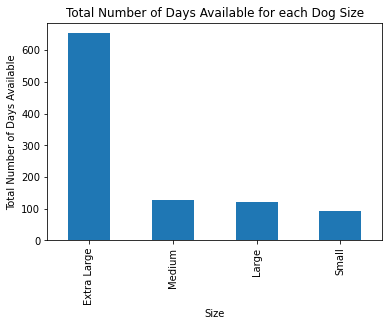

In [6]:
#Generate a bar plot showing the days vs avg size
total_days = dogs_df.groupby(['Size'])['Days Available'].mean()
bar_plot = total_days.sort_values(ascending=False).plot(kind='bar')

# Set the xlabel, ylabel, and title
bar_plot.set_ylabel("Total Number of Days Available")
bar_plot.set_title("Total Number of Days Available for each Dog Size")
plt.show()

In [7]:
#Generate a box plot showing the days vs size
avg_days = []

size_list = ['Extra Large', 'Large','Medium','Small']

for each in size_list:
    #use loc to find the rows corresponding to each
    days = dogs_df.loc[dogs_df['Size']==each]['Days Available']
    avg_days.append(days)
    print(each)

Extra Large
Large
Medium
Small


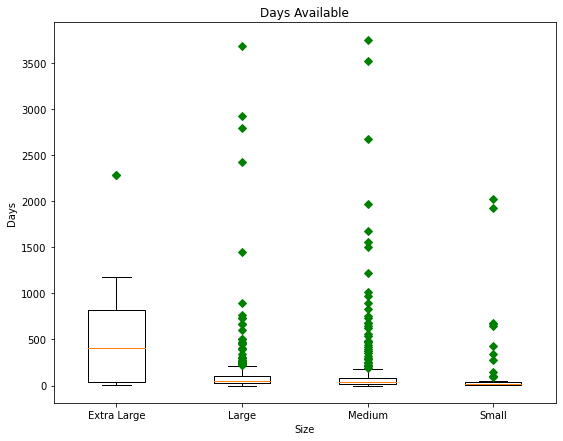

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Days Available')
ax.set_xlabel('Size')
ax.set_ylabel('Days')
ax.boxplot(avg_days,notch=0,sym='gD')
plt.xticks([1,2,3,4],size_list)

# Save the figure

plt.show()

In [9]:
#There are only a small number of "Extra Large" dogs. 
#This small sample size could be skewing the data.
#Modify grouping lists to be either big (Extra large and Large) or small (Medium and Small).

#create a new dataframe for dogs_df
dogs_df2 = dogs_df

size_group_df ={
    "Extra Large":"Big",
    "Large": "Big",
    "Medium":"Small",
    "Small":"Small"
}

dogs_df2['Group']=dogs_df2['Size'].map(size_group_df)
dogs_df2

,Pet ID,Name,Status,Publish Date,Organization ID,City,State,Breed,Age,Gender,Size,Spayed or Neutered,House Trained,Special Needs,Shots Current,Date Collected,Days Available,Group
0,54858447,Boon,adoptable,2022-03-04,GA862,Athens,GA,Mixed Breed,Adult,Male,Large,True,False,False,False,2022-04-26,53,Big
1,54802620,Casper,adoptable,2022-03-01,GA99,Macon,GA,Mixed Breed,Young,Male,Medium,True,False,False,False,2022-04-26,56,Small
2,55368350,Giacomo (In Foster),adoptable,2022-04-22,GA335,Atlanta,GA,Mixed Breed,Young,Male,Small,True,False,False,False,2022-04-26,4,Small
3,55179362,Loki,adoptable,2022-04-01,GA340,Tucker,GA,Labrador Retriever,Adult,Male,Large,True,True,True,True,2022-04-26,25,Big
4,55331643,Queen,adoptable,2022-04-18,GA217,Atlanta,GA,Pit Bull Terrier,Young,Female,Medium,False,False,False,False,2022-04-26,8,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,54255555,Aphrodite- In Foster,adoptable,2022-01-16,GA423,Chamblee,GA,Mixed Breed,Adult,Female,Large,True,False,False,False,2022-04-26,100,Big
828,55192469,Stuart Wiggle,adoptable,2022-04-03,GA217,Atlanta,GA,Black Mouth Cur,Baby,Male,Small,True,False,False,False,2022-04-26,23,Small
829,55304165,Chica,adoptable,2022-04-14,GA862,Athens,GA,Mixed Breed,Young,Female,Medium,False,False,False,False,2022-04-26,12,Small
830,55304095,Lana,adoptable,2022-04-14,GA862,Athens,GA,Mixed Breed,Adult,Female,Large,False,False,False,False,2022-04-26,12,Big


In [10]:
#Using the aggregation method, look at average with new grouping 
new_stats = dogs_df2.groupby(['Group'])['Days Available'].agg(['mean', 'median', 'var', 'std','sem'])
new_stats

,mean,median,var,std,sem
Group,,,,,
Big,136.143979,52.5,135117.351919,367.583122,18.807189
Small,121.346667,29.0,133510.382895,365.390726,17.224684


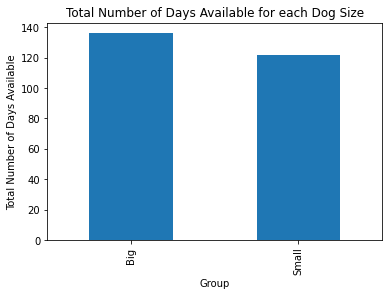

In [11]:
#Generate a bar plot showing the days vs avg size
total_days = dogs_df2.groupby(['Group'])['Days Available'].mean()
bar_plot = total_days.sort_values(ascending=False).plot(kind='bar')

# Set the xlabel, ylabel, and title
bar_plot.set_ylabel("Total Number of Days Available")
bar_plot.set_title("Total Number of Days Available for each Dog Size")
plt.show()

In [12]:
#Generate a box plot showing the days vs size
avg_days2 = []

size_list2 = ['Big','Small']

for each in size_list2:
    #use loc to find the rows corresponding to each
    days = dogs_df2.loc[dogs_df2['Group']==each]['Days Available']
    avg_days2.append(days)
    print(each)

Big
Small


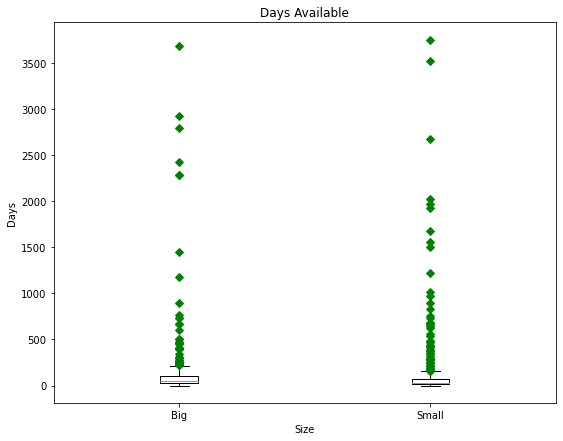

In [13]:
# Generate a box plot
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Days Available')
ax.set_xlabel('Size')
ax.set_ylabel('Days')
ax.boxplot(avg_days2,notch=0,sym='gD')
plt.xticks([1,2],size_list2)

# Save the figure

plt.show()